## GDB Files

In [1]:
import fiona
import geopandas
import matplotlib.pyplot as plt

GDB = '../src/deepmap/data/kreike/KreikeSampleExtractedDataNam52022.gdb/'

A `.gdb` "file" is actually a folder, with all kinds of vector and raster information spread across several layers (A souped-up `.tif` file). A `.gdb` file is also commonly encountered when dealing with `ArcGIS` or `QGIS`.

In [2]:
# Use fiona to list layers and `geopandas` to actually read the layer
# in a GeoDataFrame

layers = fiona.listlayers(GDB)
print(layers)

# Get a GeoDataFrame layer from a GDB file
gdf = geopandas.read_file(GDB, layer='Omuti1972')
gdf.head()

['FarmBoundary1972', 'BigTree1972', 'Omuti1972', 'waterhole1972', 'FarmBoundary1943', 'BigTree1943', 'waterhole1943', 'Cattlekraal1943', 'Cattlekraal1972', 'Omuti1943', 'OldOmuti', 'OldOmuti1943', 'OldOmuti1972', 'Field1943']


,Shape_Length,Shape_Area,geometry
0,167.027531,1575.901748,MULTIPOLYGON Z (((596614.299 8074169.192 0.000...
1,121.928883,937.654916,MULTIPOLYGON Z (((596953.299 8074258.938 0.000...
2,110.623717,918.247996,MULTIPOLYGON Z (((596742.311 8073958.704 0.000...
3,88.174473,506.948938,MULTIPOLYGON Z (((596841.682 8073856.036 0.000...
4,71.605843,313.707239,MULTIPOLYGON Z (((596836.502 8073780.919 0.000...


## Visualizing data from GDB Files

The easiest way when using a Jupyter Notebook is to do a `gdf.explore()`, which overlays the shapes in our GeoDataFrame layer on a world map (and matches the crs automatically).

In [3]:
gdf.explore()

For publication and non-interactive-Jupyter-cases though, we better know how to overlay it on map images. Let's overlay it on top of a standard world map from `geopandas`.

In [4]:
# Get a physical map of the world from geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# Set index to the country name (unique)
world = world.set_index('name', drop=False)
world.head()

/tmp/ipykernel_41335/161418888.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
name,,,,,,
Fiji,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

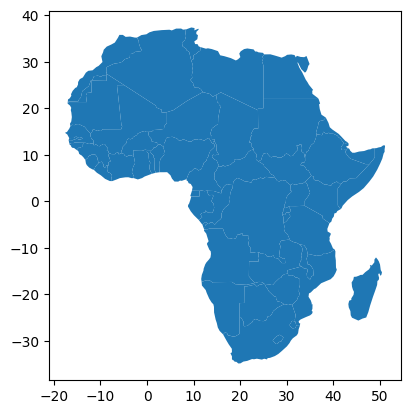

In [5]:
africa = world[(world['continent'] == 'Africa')]

# The active geometry of a GeoDataFrame gives us a GeoSeries that we can plot
africa.plot()

Some useful calculated attributes, like area/centroid/boundary are available to us for `world`, since it has a geometry column. Note that any calculations that involves geometry information (including plotting, area calculation) requires that we specify the `crs`. We didn't do so above since we only plotted Africa in isolation, but will do so now.

In [6]:
# Match coordiate reference system to that of the GeoDataFrame obtained from the gdb file.
africa = africa.to_crs(gdf.crs)
print("Area of Angola = {}".format(africa.area['Angola']))  # world.area is a Series, indexed by the same index as the DataFrame (country)

Area of Angola = 1249761741463.9636


Our Region of Interest is `Angola` and `Namibia`.

<Axes: >

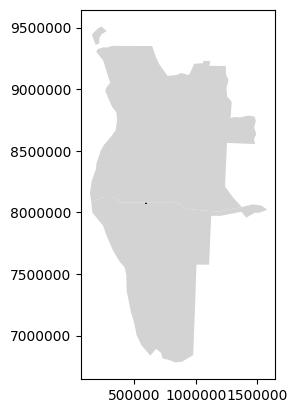

In [7]:
roi = africa[((africa['name'] == 'Angola') | (africa['name'] == 'Namibia'))]

fig, ax = plt.subplots(nrows=1, ncols=1, sharey='all', sharex='all')
ax.ticklabel_format(useOffset=False, style='plain')

roi.plot(ax=ax, color='lightgrey', edgecolor=None)
gdf.plot(ax=ax, color='blue')

The tiny blue dot above at the edge of Angola and Namibia is the region covered by the `gdf`.